In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, LeaveOneOut, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, make_scorer)
from sklearn.utils import resample
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Lab/colon.csv"

In [ ]:
data =pd.read_csv(file_path)
data

,Unnamed: 0,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
0,1,1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2
1,2,1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1
2,3,2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,2
3,4,2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,1
4,5,3,1,Obs,0,71,0,0,1,7.0,1,2.0,2,0,1,963,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,1854,927,1,Lev,1,76,0,0,1,1.0,1,3.0,3,0,0,851,1
1854,1855,928,1,Lev+5FU,0,48,1,0,0,4.0,0,2.0,3,1,1,2072,2
1855,1856,928,1,Lev+5FU,0,48,1,0,0,4.0,0,2.0,3,1,1,2072,1
1856,1857,929,1,Lev,0,66,1,0,0,1.0,0,2.0,3,0,0,1820,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1858 non-null   int64  
 1   id          1858 non-null   int64  
 2   study       1858 non-null   int64  
 3   rx          1858 non-null   object 
 4   sex         1858 non-null   int64  
 5   age         1858 non-null   int64  
 6   obstruct    1858 non-null   int64  
 7   perfor      1858 non-null   int64  
 8   adhere      1858 non-null   int64  
 9   nodes       1822 non-null   float64
 10  status      1858 non-null   int64  
 11  differ      1812 non-null   float64
 12  extent      1858 non-null   int64  
 13  surg        1858 non-null   int64  
 14  node4       1858 non-null   int64  
 15  time        1858 non-null   int64  
 16  etype       1858 non-null   int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 246.9+ KB


In [ ]:
data.describe()

,Unnamed: 0,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
count,1858.000000,1858.000000,1858.0,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1822.000000,1858.000000,1812.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000
mean,929.500000,465.000000,1.0,0.520990,59.754575,0.193757,0.029064,0.145318,3.659715,0.495156,2.062914,2.886975,0.265877,0.274489,1537.545748,1.500000
std,536.502718,268.251243,0.0,0.499694,11.945670,0.395347,0.168030,0.352516,3.571581,0.500111,0.514198,0.488017,0.441918,0.446376,946.703810,0.500135
min,1.000000,1.000000,1.0,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,8.000000,1.000000
25%,465.250000,233.000000,1.0,0.000000,53.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,566.000000,1.000000
50%,929.500000,465.000000,1.0,1.000000,61.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1855.000000,1.500000
75%,1393.750000,697.000000,1.0,1.000000,69.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2331.000000,2.000000
max,1858.000000,929.000000,1.0,1.000000,85.000000,1.000000,1.000000,1.000000,33.000000,1.000000,3.000000,4.000000,1.000000,1.000000,3329.000000,2.000000


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
id,0
study,0
rx,0
sex,0
age,0
obstruct,0
perfor,0
adhere,0
nodes,36


In [ ]:
print("Columns:", data.columns)

Columns: Index(['Unnamed: 0', 'id', 'study', 'rx', 'sex', 'age', 'obstruct', 'perfor',
       'adhere', 'nodes', 'status', 'differ', 'extent', 'surg', 'node4',
       'time', 'etype'],
      dtype='object')


In [ ]:
data.duplicated( ['Unnamed: 0', 'id', 'study', 'rx', 'sex', 'age', 'obstruct', 'perfor',
       'adhere', 'nodes', 'status', 'differ', 'extent', 'surg', 'node4',
       'time', 'etype'])

,0
0,False
1,False
2,False
3,False
4,False
...,...
1853,False
1854,False
1855,False
1856,False


In [ ]:
data.duplicated().sum()

np.int64(0)

# Visualize distributions

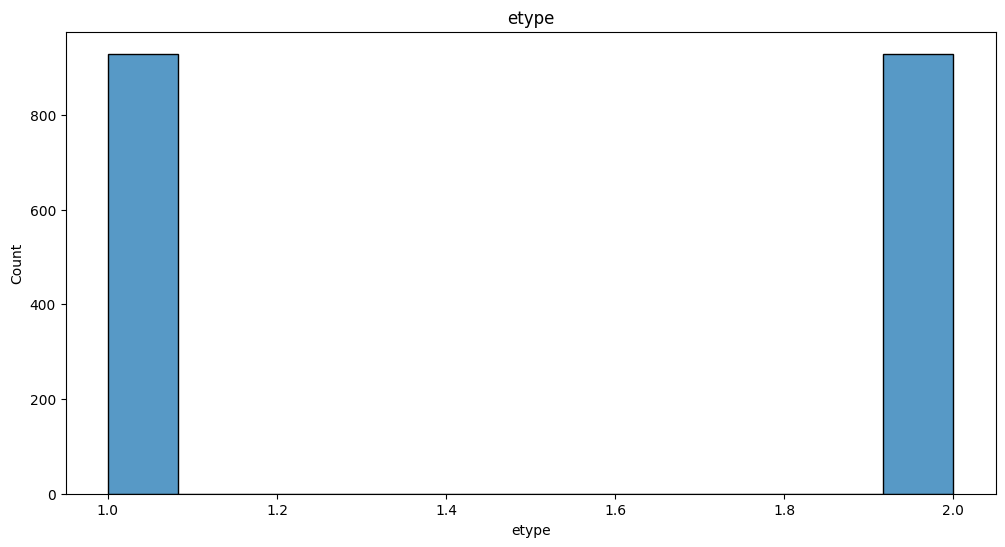

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['etype'])  # Replace with actual target column name
plt.title('etype')
plt.show()

# Correlation matrix

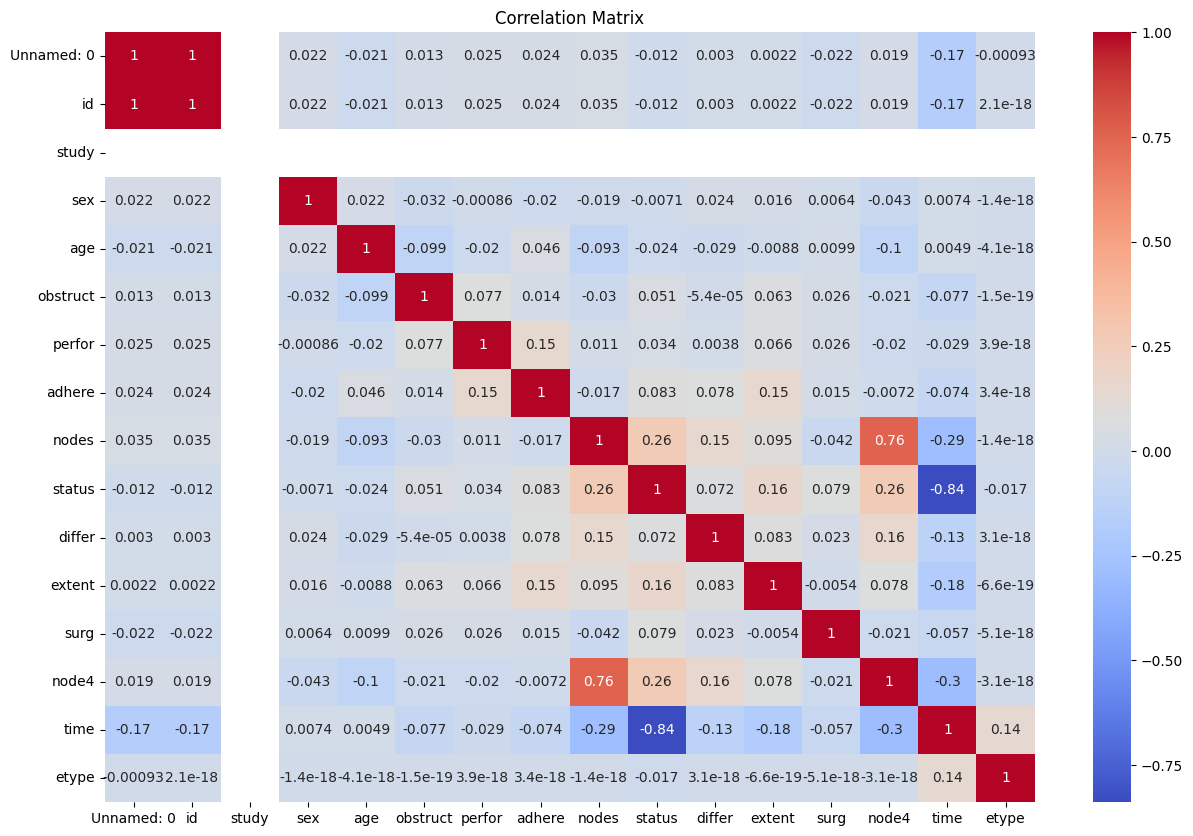

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [ ]:
X = data.drop('etype', axis=1)
y = data['etype']

# Identify categorical and numerical columns

In [ ]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model pipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Assuming 'numerical_cols' and 'categorical_cols' are defined

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor())])

# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}


# Evaluate model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict on the test set using the trained model
y_pred = best_model.predict(X_test)

print("\nModel Evaluation:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R² Score: {r2_score(y_test, y_pred)}")


Model Evaluation:
RMSE: 0.49199297220359967
R² Score: 0.03174367368663267


# Feature Importance

In [ ]:
feature_names = (numerical_cols.tolist() +
                list(best_model.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .named_steps['onehot']
                    .get_feature_names_out(categorical_cols)))

importances = best_model.named_steps['regressor'].feature_importances_

# Create DataFrame for feature importance

In [ ]:
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance

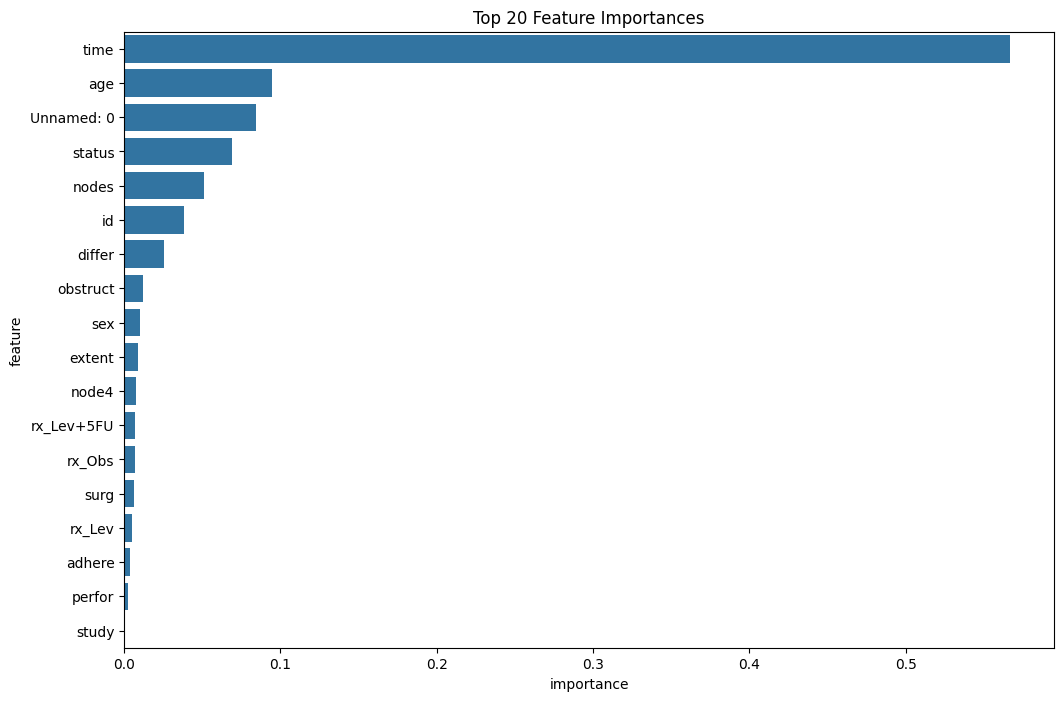

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

# Actual vs Predicted plot

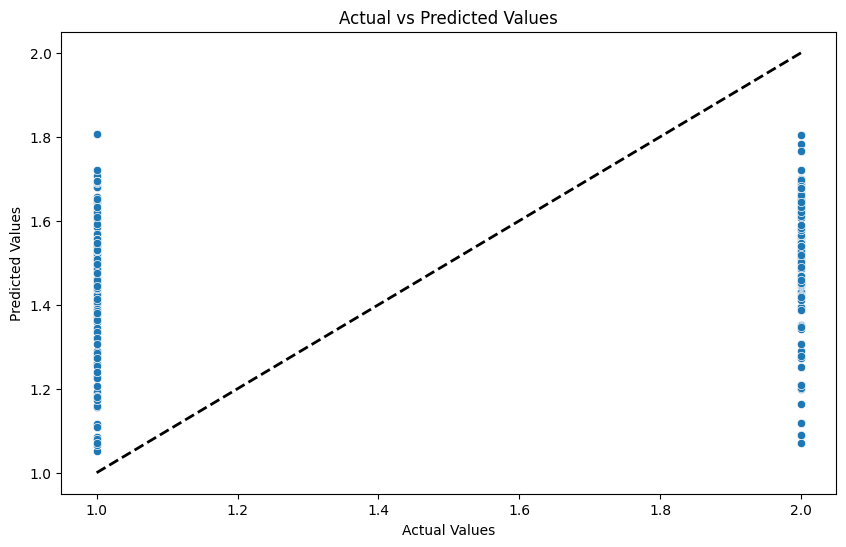

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()